<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Exp_9_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importing the necessary libraries and Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [ ]:
# 2. Importing the Dataset

# Read the Excel file without specifying usecols to inspect the actual column names
dataset = pd.read_excel("/content/kmean.xlsx")
dataset.columns = ["Feature - 1" , "Feature - 2"]

,Feature - 1,Feature - 2
0,5.658583,4.799964
1,6.352579,3.290854
2,2.904017,4.612204
3,3.231979,4.939894
4,1.247923,4.932678
...,...,...
294,7.302787,3.380160
295,6.991984,2.987067
296,4.825534,2.779617
297,6.117681,2.854757


In [ ]:
# 3. Geting the Statistics of a Dataset

dataset.describe()

,Feature - 1,Feature - 2
count,299.000000,299.000000
mean,3.690537,2.981681
std,1.925842,1.685282
min,-0.245127,0.205810
25%,2.163163,1.205974
50%,3.231979,2.949704
75%,5.516022,4.808849
max,8.203398,5.784297


In [ ]:
# 4. Find the the no. of Clusters

# Randomly initialize the centroids by selecting 3 unique points from the dataset
# `random.sample(range(0, len(dataset)), 3)` will select 3 random indices without replacement from the dataset.
# Each selected index represents a row in the dataset, which will serve as an initial centroid.
init_centroids = random.sample(range(0, len(dataset)), 3)

# Create an empty list to store the initial centroid points.
centroids = []
for i in init_centroids:
    # Append the data point at each randomly chosen index to the centroids list.
    centroids.append(dataset.iloc[i])

# Convert the list of centroids to a NumPy array for easier manipulation in further calculations.
centroids = np.array(centroids)

# Print the initialized centroids
centroids


array([[2.17989333, 1.30879831],
       [5.99423154, 2.75707858],
       [1.15354031, 4.67866717]])

In [ ]:
# 5. Preprocessing the Data

X=np.array(dataset)

In [ ]:
# 6. Function to Claculate the Euclidian Distance

def  Calculate_Distance(i,j):
  return np.sqrt(np.sum((i-j)**2))

In [ ]:
# 7. Function to find the Nearest Centroid

def Find_Nerest_Centroid(centroids,X):
  assigned_cluster=[]
  for i in X:
    dist=[]#list of calced distances
    for j in centroids:
      dist.append(Calculate_Distance(i,j))
    assigned_cluster.append(np.argmin(dist))
  return assigned_cluster

In [ ]:
# 8. Function For Getting the New Centroids i.e. Updating the Old Centroids

def Calculating_Centroids(cluster_number,X):
  new_centorids=[]
  new_df=pd.concat([pd.DataFrame(X),pd.Series(cluster_number,name='cluster')],axis=1)
  for c in set(new_df['cluster']):
    current_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    cluster_mean=current_cluster.mean(axis=0)
    new_centorids.append(cluster_mean)
    return new_centorids

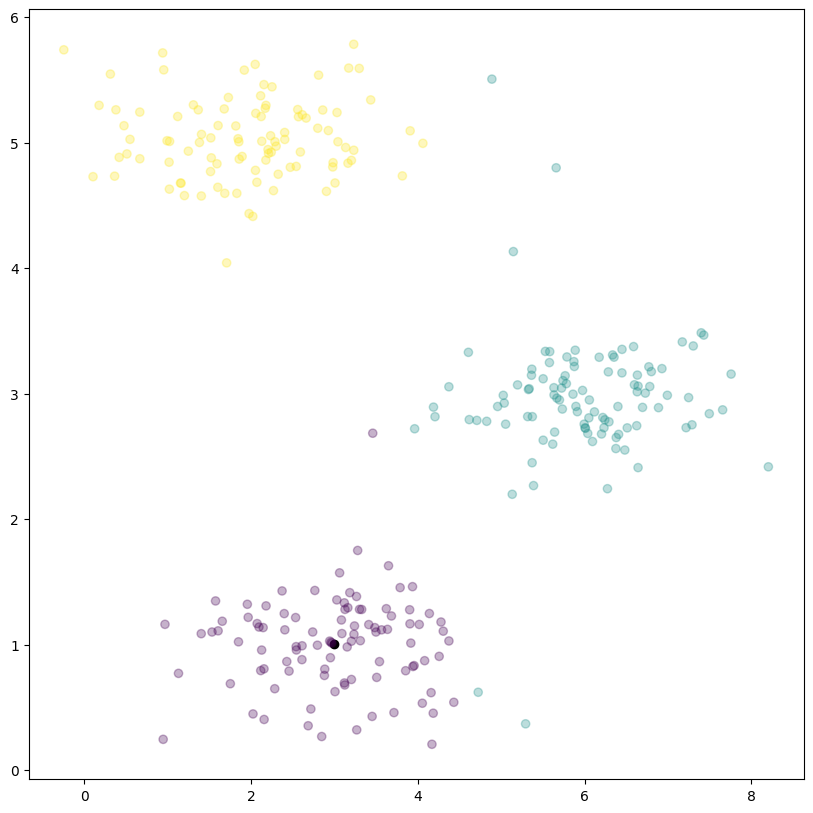

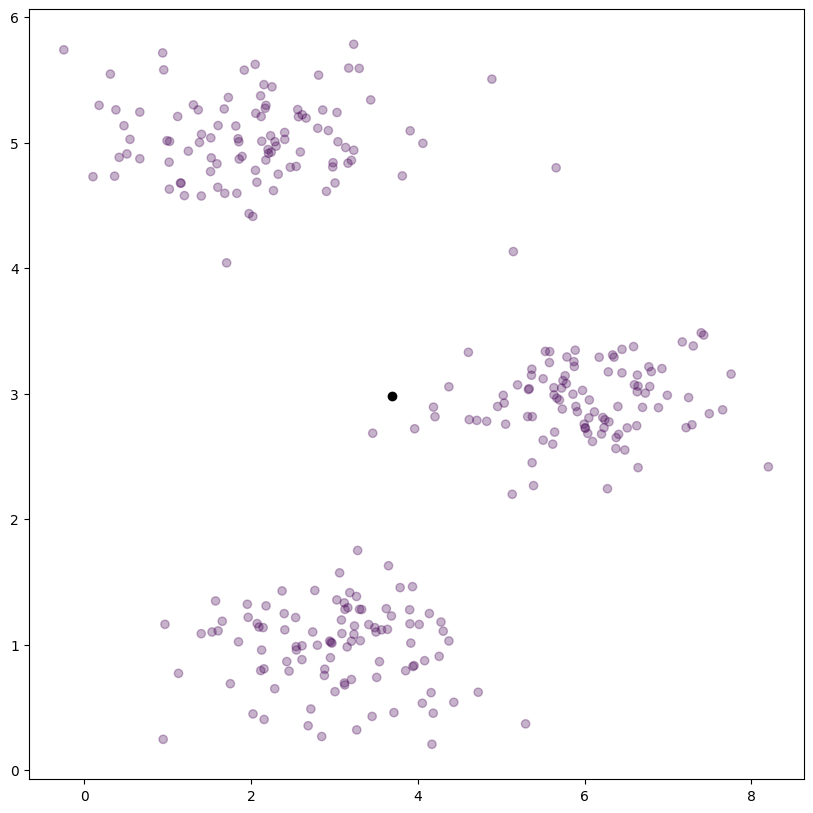

In [ ]:
# 9. Training the Model

epochs=10
for i in range(epochs):
  get_centroids=Find_Nerest_Centroid(centroids,X)
  centroids=Calculating_Centroids(get_centroids,X)
  if i == 0 or i == epochs - 1 :
    plt.figure(figsize=(10,10))
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color="black")
    plt.scatter(X[:,0],X[:,1],c=get_centroids,alpha =0.3)
    plt.show()